In [5]:
import os
os.environ["OPENAI_DEFAULT_MODEL"] = 'gpt-4o-mini'

In [6]:

!pip install yfinance matplotlib

In [7]:
import yfinance as yf
import matplotlib.pyplot as plt

ticker = "NVDA"
df = yf.download(ticker, start="2024-05-01", end="2024-05-26")

/tmp/ipykernel_15952/1393723561.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2024-05-01", end="2024-05-26")
[*********************100%***********************]  1 of 1 completed


In [8]:

df.head()


Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2024-05-01,83.007950,85.965772,81.222658,85.043143,559863000
2024-05-02,85.782852,86.202683,83.166889,84.415393,377898000
2024-05-03,88.753670,89.245471,87.005365,87.754068,398341000
2024-05-06,92.103340,92.183310,89.019568,89.354434,376203000
2024-05-07,90.517967,91.744476,88.975582,91.061749,437342000


In [9]:

df.tail()

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2024-05-20,94.742279,95.162110,93.402816,93.712690,318764000
2024-05-21,95.348053,95.362047,93.142929,93.561761,328946000
2024-05-22,94.912224,95.981798,93.211904,95.421024,548648000
2024-05-23,103.757698,106.277691,101.479598,101.987399,835065000
2024-05-24,106.426636,106.432630,102.959014,104.407435,429494000


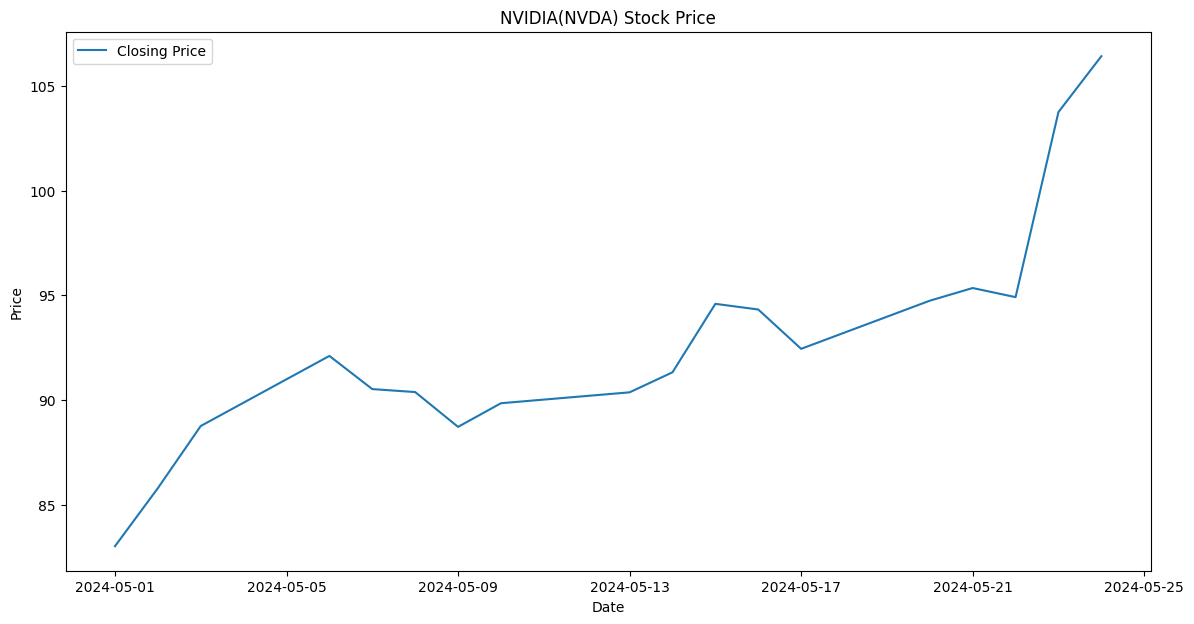

In [10]:
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Closing Price')
plt.title('NVIDIA(NVDA) Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [11]:

df.rename(columns={
    'Open': '시가',
    'High': '고가',
    'Low': '저가',
    'Close': '종가',
    'Adj Close': '수정 종가',
    'Volume': '거래량'
}, inplace=True)

df.rename_axis('날짜', inplace=True)

In [12]:

df.head()


Price,종가,고가,저가,시가,거래량
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
날짜,,,,,
2024-05-01,83.007950,85.965772,81.222658,85.043143,559863000
2024-05-02,85.782852,86.202683,83.166889,84.415393,377898000
2024-05-03,88.753670,89.245471,87.005365,87.754068,398341000
2024-05-06,92.103340,92.183310,89.019568,89.354434,376203000
2024-05-07,90.517967,91.744476,88.975582,91.061749,437342000


In [13]:

from io import StringIO
csv_buffer = StringIO()
df.to_csv(csv_buffer)

csv_data = csv_buffer.getvalue()
print(csv_data)

Price,종가,고가,저가,시가,거래량
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
날짜,,,,,
2024-05-01,83.00794982910156,85.96577177323404,81.22265755025684,85.04314260728708,559863000
2024-05-02,85.78285217285156,86.20268321187375,83.16688916320159,84.41539269757547,377898000
2024-05-03,88.75366973876953,89.24547072408387,87.00536516764065,87.75406766785412,398341000
2024-05-06,92.10334014892578,92.1833101500868,89.0195684762701,89.35443427647793,376203000
2024-05-07,90.5179672241211,91.7444763476329,88.97558195332661,91.06174947211589,437342000
2024-05-08,90.37602233886719,91.15770881690996,89.38441272091335,89.44739118815833,325721000
2024-05-09,88.7116928100586,91.03576473617252,88.19589926476827,90.49298150601264,378013000
2024-05-10,89.84222412109375,91.3646205433242,89.19148226311106,90.26905611419771,335325000
2024-05-13,90.363037109375,90.9617978228875,88.49377833765243,90.44200043253207,289680000
2024-05-14,91.31965637207031,91.61453717454157,88.89861527885883,89.56335162049751,296507000
2024-05-15,94.592

In [14]:

!pip install openai

In [15]:

import os
import openai

openai.api_key = os.getenv("OPENAI_API_KEY")

response = openai.chat.completions.create(
  model=os.getenv("OPENAI_DEFAULT_MODEL"),
  messages=[
    {
      "role": "system",
      "content": "다음은 엔비디아의 날짜별 주가 데이터야. 이 데이터를 분석해서 보고해줘."
    },
    {
      "role": "user",
      "content": csv_data
    }
  ],
  temperature=0,
  max_tokens=1024,
  top_p=1,
  frequency_penalty=0,
  presence_penalty=0
)

print(response.choices[0].message.content)

OpenAIError: The api_key client option must be set either by passing api_key to the client or by setting the OPENAI_API_KEY environment variable